# import libraries

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

In [46]:
df = pd.read_csv(r"D:\FCDS\internship\CodeAlpha\unemployment analysis\Unemployment_Rate_upto_11_2020.csv")

# Eda

In [48]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [49]:
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64


In [50]:
print("\nData Description:\n", df.describe())


Data Description:
         Estimated Unemployment Rate (%)   Estimated Employed  \
count                        267.000000         2.670000e+02   
mean                          12.236929         1.396211e+07   
std                           10.803283         1.336632e+07   
min                            0.500000         1.175420e+05   
25%                            4.845000         2.838930e+06   
50%                            9.650000         9.732417e+06   
75%                           16.755000         2.187869e+07   
max                           75.850000         5.943376e+07   

        Estimated Labour Participation Rate (%)   longitude    latitude  
count                                267.000000  267.000000  267.000000  
mean                                  41.681573   22.826048   80.532425  
std                                    7.845419    6.270731    5.831738  
min                                   16.770000   10.850500   71.192400  
25%                              

# preprocessing

In [55]:
df.columns = df.columns.str.strip()  # Remove spaces from column names
df2_cleaned = df.rename(columns={
    'Region': 'State',
    'Region.1': 'Zone',
    'Estimated Unemployment Rate (%)': 'Unemployment_Rate',
    'Estimated Employed': 'Employed',
    'Estimated Labour Participation Rate (%)': 'Labour_Participation_Rate'
})

In [57]:
df2_cleaned['Date'] = df2_cleaned['Date'].str.strip()  
df2_cleaned['Date'] = pd.to_datetime(df2_cleaned['Date'], format='%d-%m-%Y')

In [64]:
df2_cleaned['Month'] = df2_cleaned['Date'].dt.month
df2_cleaned['Year'] = df2_cleaned['Date'].dt.year

In [68]:
monthly_avg = df2_cleaned.groupby("Month")["Unemployment_Rate"].mean().reset_index()

C:\Users\pc\AppData\Local\Temp\ipykernel_10312\3760937478.py:12: UserWarning:

Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.

C:\Users\pc\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.



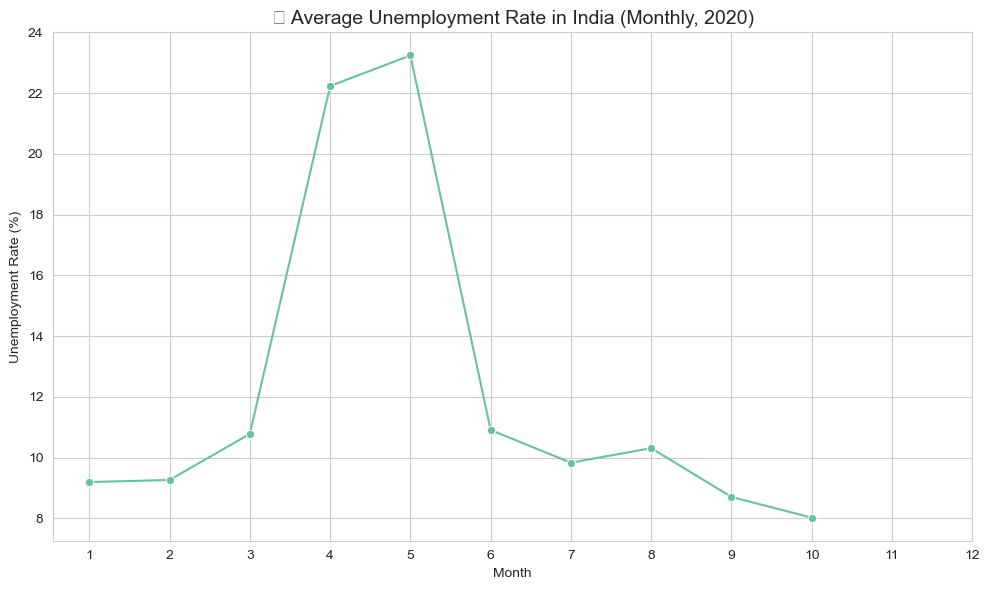

In [70]:
sns.set_style("whitegrid")  

monthly_avg = df2_cleaned.groupby("Month")["Unemployment_Rate"].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_avg, x="Month", y="Unemployment_Rate", marker="o")
plt.title("📈 Average Unemployment Rate in India (Monthly, 2020)", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Unemployment Rate (%)")
plt.xticks(range(1, 13))
plt.grid(True)
plt.tight_layout()
plt.show()


## April 2020 marked the highest unemployment spike, with an average rate of over 20%, directly correlating with the peak of COVID-19 lockdowns in India.

## A steady decline was observed from June onwards, indicating gradual economic recovery.

C:\Users\pc\AppData\Local\Temp\ipykernel_10312\429237074.py:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


C:\Users\pc\AppData\Local\Temp\ipykernel_10312\429237074.py:20: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




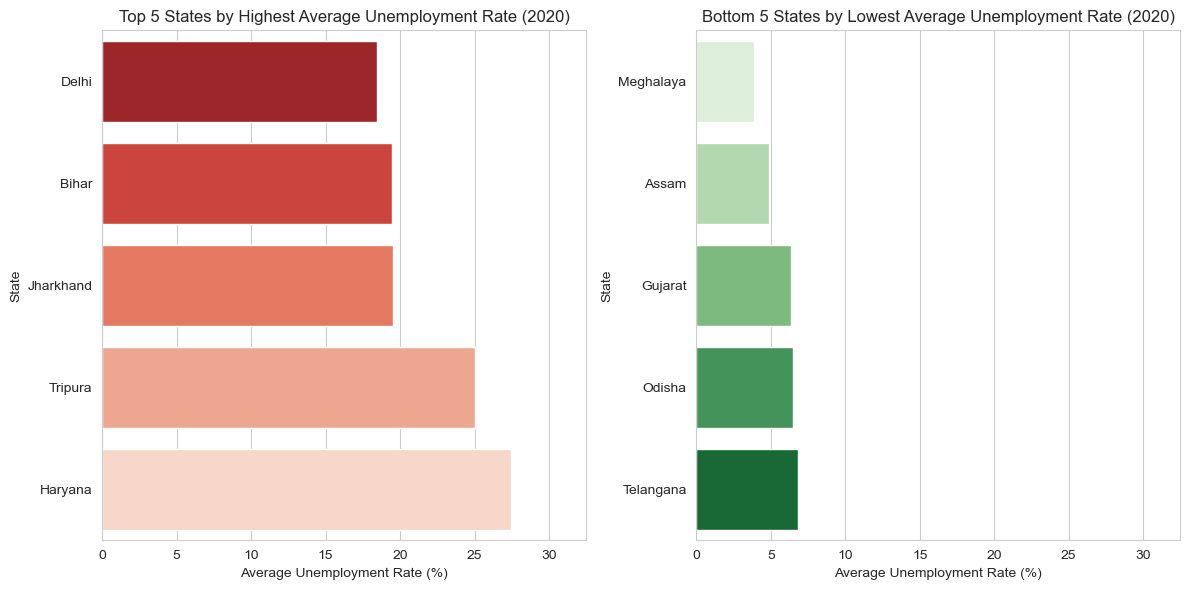

In [73]:

# Group by state and calculate average unemployment
avg_unemployment_by_state = df2_cleaned.groupby('State')['Unemployment_Rate'].mean().sort_values()

# Extract top 5 and bottom 5 states
top_5_states = avg_unemployment_by_state.tail(5)
bottom_5_states = avg_unemployment_by_state.head(5)

# Plotting
plt.figure(figsize=(12, 6))

# Top 5 states with highest unemployment
plt.subplot(1, 2, 1)
sns.barplot(x=top_5_states.values, y=top_5_states.index, palette='Reds_r')
plt.title("Top 5 States by Highest Average Unemployment Rate (2020)")
plt.xlabel("Average Unemployment Rate (%)")
plt.xlim(0, max(top_5_states.max(), bottom_5_states.max()) + 5)

# Bottom 5 states with lowest unemployment
plt.subplot(1, 2, 2)
sns.barplot(x=bottom_5_states.values, y=bottom_5_states.index, palette='Greens')
plt.title("Bottom 5 States by Lowest Average Unemployment Rate (2020)")
plt.xlabel("Average Unemployment Rate (%)")
plt.xlim(0, max(top_5_states.max(), bottom_5_states.max()) + 5)

plt.tight_layout()
plt.show()


# State-Level Insights
## Top 5 States with Highest Average Unemployment Rate:

## These include states like Haryana and Delhi, which consistently faced high unemployment throughout the year.

## Bottom 5 States with Lowest Unemployment:

## Telangana and Odisha recorded the most stable and low unemployment rate

In [99]:
correlation = df2_cleaned['Labour_Participation_Rate'].corr(df2_cleaned['Unemployment_Rate'])

print(f"📊 Pearson Correlation = {correlation:.2f}")


📊 Pearson Correlation = -0.07


In [103]:
area_avg = df2_cleaned.groupby('Area')['Estimated Unemployment Rate (%)'].mean()

area_avg.plot(kind='bar', color=['#ff9999', '#66b3ff'], title="Average Unemployment Rate by Area")
plt.ylabel("Unemployment Rate (%)")
plt.grid(True)
plt.show()


KeyError: 'Area'